## 1. Import Libraries and Utilities

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN, MeanShift, KMeans, AgglomerativeClustering, estimate_bandwidth
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
!pip install minisom

In [2]:
from minisom import MiniSom
from EDA.age import calc_age
from EDA.educ import education
from EDA.data_load import data_load

## 2. Import Dataset

In [3]:
# Import dataset
cust_info = data_load('.\\cust_data.csv')

# Set 'customer_id' as index
cust_info = cust_info.set_index('customer_id')

cust_info

,customer_name,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,...,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,age,education,female,total_lifetime_spend,number_dependents
customer_id,,,,,,,,,,,,,,,,,,,,,
4239,Sara Moscowitz,1999-09-10 15:11:00,0,0,0,2,91.0,20.0,22.0,22.0,...,0.192154,2017,NaN,38.754263,-9.163397,23,HS,1,1545.0,0
19330,Donald Robertson,1981-06-26 22:58:00,1,0,0,2,197.0,5958.0,21.0,20.0,...,0.098647,2015,NaN,38.777761,-9.156197,41,HS,0,10219.0,1
2272,Phd. Felicia Bradshaw,1987-01-31 09:08:00,1,1,0,20,397.0,20.0,9.0,310.0,...,0.497251,2008,NaN,38.785329,-9.127113,36,Phd.,1,1753.0,2
25288,Emma Williams,1942-06-17 00:02:00,3,4,1,2,5282.0,237.0,12.0,499.0,...,0.206713,2010,NaN,38.744086,-9.156589,80,HS,1,11195.0,7
12829,Hilda Huerta,2000-01-31 11:43:00,0,0,0,2,82.0,22.0,21.0,9.0,...,0.200625,2015,NaN,38.756024,-9.162970,23,HS,1,1370.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,Phd. Karen Watts,1974-11-01 05:26:00,0,0,1,2,209.0,5474.0,20.0,18.0,...,0.096366,2008,935162.0,38.734446,-9.171911,48,Phd.,1,9730.0,0
26447,Curtis Thompson,1986-02-21 11:27:00,0,0,0,3,185.0,1066.0,15.0,267.0,...,0.118998,2014,NaN,38.767070,-9.144301,37,HS,0,2416.0,0
182,Richard Carter,2001-01-14 05:49:00,0,0,0,2,83.0,23.0,23.0,23.0,...,0.199432,2016,953891.0,38.728487,-9.164140,22,HS,0,1491.0,0


## 3. Data Scaling and Normalization

In [4]:
num_cust_info = cust_info.loc[:,(cust_info.dtypes != 'object') == True]
num_cust_info = num_cust_info.drop([ 'loyalty_card_number', 'latitude'], axis=1)
num_cust_info

,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,...,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,longitude,age,female,total_lifetime_spend,number_dependents
customer_id,,,,,,,,,,,,,,,,,,,,,
4239,0,0,0,2,91.0,20.0,22.0,22.0,195.0,964.0,...,47.0,105.0,85.0,0.192154,2017,-9.163397,23,1,1545.0,0
19330,1,0,0,2,197.0,5958.0,21.0,20.0,1435.0,434.0,...,45.0,1964.0,85.0,0.098647,2015,-9.156197,41,0,10219.0,1
2272,1,1,0,20,397.0,20.0,9.0,310.0,379.0,222.0,...,46.0,5.0,408.0,0.497251,2008,-9.127113,36,1,1753.0,2
25288,3,4,1,2,5282.0,237.0,12.0,499.0,873.0,460.0,...,617.0,1078.0,1956.0,0.206713,2010,-9.156589,80,1,11195.0,7
12829,0,0,0,2,82.0,22.0,21.0,9.0,172.0,856.0,...,48.0,103.0,83.0,0.200625,2015,-9.162970,23,1,1370.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,0,0,1,2,209.0,5474.0,20.0,18.0,1435.0,521.0,...,57.0,1984.0,112.0,0.096366,2008,-9.171911,48,1,9730.0,0
26447,0,0,0,3,185.0,1066.0,15.0,267.0,276.0,287.0,...,50.0,197.0,22.0,0.118998,2014,-9.144301,37,0,2416.0,0
182,0,0,0,2,83.0,23.0,23.0,23.0,189.0,921.0,...,51.0,94.0,77.0,0.199432,2016,-9.164140,22,0,1491.0,0


In [5]:
scaler = StandardScaler()
# Here, we are using fit_transform, by fitting and
# immediately transforming the data into the scaled values
scaled_data = scaler.fit_transform(num_cust_info)

### DBSCAN

In [6]:
num_cust_info['dbscan_clustering'] = DBSCAN(
    eps=2, min_samples=400
    ).fit_predict(scaled_data)

In [7]:
num_cust_info['dbscan_clustering'].value_counts()

-1     8838
 8     2502
 3     2419
 6     2387
 1     2332
 2     2292
 4     2278
 11    1765
 10    1689
 5     1137
 7     1109
 9      626
 0      624
Name: dbscan_clustering, dtype: int64

## 4. K-Means

In [8]:
dispersion = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    dispersion.append(kmeans.inertia_)

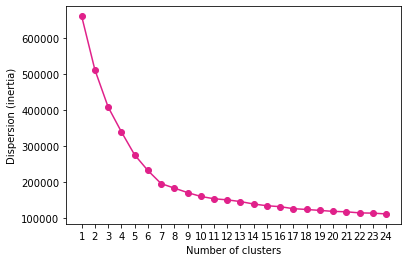

In [9]:
plt.plot(range(1, 25), dispersion, marker='o', color = '#e0218a')
plt.xticks(range(1, 25))
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(scaled_data)
num_cust_info['cluster_kmeans'] = kmeans.predict(scaled_data)

In [11]:
num_cust_info.groupby(['cluster_kmeans']).mean().T

cluster_kmeans,0,1,2,3,4,5,6
kids_home,0.975034,0.689588,0.997693,3.136761,0.247862,1.129582,0.000000
teens_home,0.092704,0.068547,0.271393,1.845077,0.177833,0.766594,0.000000
number_complaints,1.193536,0.500000,1.550545,0.934354,0.201711,0.329701,0.000000
distinct_stores_visited,19.097155,1.992625,7.995386,3.008972,2.420884,1.996632,1.000000
lifetime_spend_groceries,298.003484,200.406291,14984.949664,4997.646171,3155.204027,970.927680,2.701888
lifetime_spend_electronics,19.517902,4999.557484,199.983851,199.941575,627.341768,83.256786,1.149657
typical_hour,9.041223,20.951844,11.915268,17.394092,18.133464,9.746978,0.625775
lifetime_spend_vegetables,290.702148,20.033623,799.404992,602.111379,282.008197,1423.717060,2.124256
lifetime_spend_nonalcohol_drinks,290.882330,1500.946855,900.720218,901.078556,327.859943,37.074896,2.302029
lifetime_spend_alcohol_drinks,204.435456,499.866161,599.076971,500.893435,481.012830,34.495344,2.704794


In [12]:
num_cust_info.mean()

kids_home                                     1.146776
teens_home                                    0.512968
number_complaints                             0.764418
distinct_stores_visited                       6.121108
lifetime_spend_groceries                   3978.899334
lifetime_spend_electronics                  965.303071
typical_hour                                 14.357796
lifetime_spend_vegetables                   564.245311
lifetime_spend_nonalcohol_drinks            628.791908
lifetime_spend_alcohol_drinks               379.369654
lifetime_spend_meat                         513.912460
lifetime_spend_fish                         774.879925
lifetime_spend_hygiene                      162.835290
lifetime_spend_videogames                   536.869491
lifetime_total_distinct_products           1123.962169
percentage_of_products_bought_promotion       0.190981
year_first_transaction                     2008.683912
longitude                                    -9.157744
age       

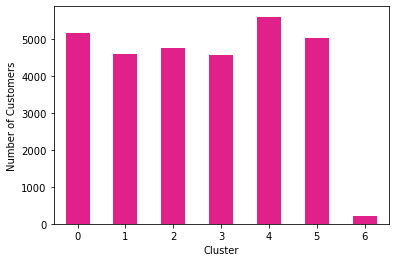

In [13]:
# Create a bar chart of the number of customers in each cluster
num_cust_info.groupby(['cluster_kmeans']).size().plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
# Show the plot
plt.show()

# Association Rules

In [14]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import ast

In [15]:
# Import utilities
from utils import *

# DATA LOAD NOT WORKING FOR EXCEL

In [45]:
prod_map = pd.read_excel('.\\Data\Product Mapping Excel File.xlsx')
prod_map

<>:1: DeprecationWarning: invalid escape sequence \P
<>:1: DeprecationWarning: invalid escape sequence \P
C:\Users\abdar\AppData\Local\Temp/ipykernel_14264/4010249089.py:1: DeprecationWarning: invalid escape sequence \P
  prod_map = pd.read_excel('.\\Data\Product Mapping Excel File.xlsx')


,product_name,category
0,champagne,alcohol_drinks
1,bramble,alcohol_drinks
2,white wine,alcohol_drinks
3,dessert wine,alcohol_drinks
4,french wine,alcohol_drinks
...,...,...
159,portal,videogames
160,portal 2,videogames
161,final fantasy XX,videogames
162,final fantasy XIX,videogames


In [49]:
# Import dataset
basket = data_load('.\\Data\\Customer Basket Dataset.csv')
basket.head()

,customer_id,invoice_id,list_of_goods
0,7980,6494405,"['fresh bread', 'cake', 'grated cheese', 'fren..."
1,9995,6855482,"['bramble', 'beer', 'white wine', 'almonds', '..."
2,10060,3614116,"['fromage blanc', 'olive oil', 'tomato sauce',..."
3,1461,6464656,"['pokemon shield', 'white wine', 'google table..."
4,7830,10330249,"['olive oil', 'deodorant', 'whole weat flour',..."


In [17]:
# Create list of lists
list_of_goods = [ast.literal_eval(product) for product in basket["list_of_goods"].values]
list_of_goods

[['fresh bread',
  'cake',
  'grated cheese',
  'french fries',
  'whole wheat pasta',
  'candy bars',
  'beats headphones',
  'half-life 2',
  'phone car charger',
  'cream',
  'cereals',
  'babies food'],
 ['bramble',
  'beer',
  'white wine',
  'almonds',
  'half-life: alyx',
  'cauliflower',
  'cider',
  'yogurt cake',
  'champagne',
  'chili',
  'soda',
  'black beer',
  'catfish'],
 ['fromage blanc',
  'olive oil',
  'tomato sauce',
  'avocado',
  'megaman zero 2',
  'cooking oil',
  'iPad',
  'shampoo',
  'oil',
  'green tea'],
 ['pokemon shield',
  'white wine',
  'google tablet',
  'canned_tuna',
  'green beans',
  'bacon',
  'cider',
  'pokemon sword',
  'beats headphones',
  'airpods',
  'phone charger',
  'metroid prime'],
 ['olive oil',
  'deodorant',
  'whole weat flour',
  'chutney',
  'escalope',
  'gums',
  'rice',
  'airpods',
  'oil',
  'cookies',
  'muffins',
  'laptop'],
 ['ratchet & clank 2',
  'megaman zero',
  'eggplant',
  'body spray',
  'barbecue sauce',
  's

In [18]:
# Separate train and test datasets
train = list_of_goods[:int(len(list_of_goods)*0.8)]
test = list_of_goods[int(len(list_of_goods)*0.8):]

In [19]:
# See size of each dataset
print('We have {} rows in the train set.'.format(len(train)))
print('We have {} rows in the test set.'.format(len(test)))

We have 64000 rows in the train set.
We have 16000 rows in the test set.


In [20]:
# Encoding our data
te = TransactionEncoder()
te_fit = te.fit(train).transform(train)
transactions_items = pd.DataFrame(te_fit, columns=te.columns_)

In [21]:
# Viewing our transactions_items
transactions_items.head(10)

,airpods,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,beats headphones,beer,...,vacuum cleaner,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,False,True,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [22]:
# Using 5% as minimum support and obtaining frequent_itemsets_grocery
# In real life scenario, support is typically a value between 3% to 8%, depending
# on the dataset
frequent_itemsets_grocery = apriori(
    transactions_items, min_support=0.05, use_colnames=True
    )

In [23]:
frequent_itemsets_grocery.sort_values(by='support', ascending=False)

,support,itemsets
34,0.465625,(oil)
14,0.464234,(cooking oil)
5,0.361203,(cake)
6,0.299484,(candy bars)
101,0.297656,"(oil, cooking oil)"
...,...,...
134,0.050422,"(candy bars, gums, cake)"
44,0.050328,(ratchet & clank 2)
147,0.050297,"(napkins, cooking oil, candy bars)"
10,0.050172,(champagne)


In [24]:
# We'll use a confidence level of 20%
rules_grocery = association_rules(frequent_itemsets_grocery, 
                                  metric="confidence", 
                                  min_threshold=0.2)

In [25]:
rules_grocery

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(asparagus),(carrots),0.147078,0.105656,0.059687,0.405822,3.840963,0.044148,1.505177
1,(carrots),(asparagus),0.105656,0.147078,0.059687,0.564922,3.840963,0.044148,1.960387
2,(asparagus),(tomatoes),0.147078,0.132406,0.079359,0.539573,4.075132,0.059885,1.884324
3,(tomatoes),(asparagus),0.132406,0.147078,0.079359,0.599363,4.075132,0.059885,2.128913
4,(babies food),(cake),0.248984,0.361203,0.122609,0.492438,1.363327,0.032675,1.258559
...,...,...,...,...,...,...,...,...,...
269,"(oil, cake)","(cooking oil, gums)",0.228047,0.157969,0.053875,0.236245,1.495519,0.017851,1.102489
270,"(cooking oil, gums)","(oil, cake)",0.157969,0.228047,0.053875,0.341048,1.495519,0.017851,1.171487
271,"(cooking oil, cake)","(oil, gums)",0.227734,0.159484,0.053875,0.236569,1.483339,0.017555,1.100972
272,"(gums, cake)","(oil, cooking oil)",0.122297,0.297656,0.053875,0.440526,1.479984,0.017473,1.255365


In [26]:
frequent_itemsets_grocery_iter_2 = apriori(
    transactions_items, min_support=0.02, use_colnames=True
    )

# We'll use a confidence level of 20%
rules_grocery_iter_2 = association_rules(frequent_itemsets_grocery_iter_2, 
                                  metric="confidence", 
                                  min_threshold=0.2)

In [27]:
rules_grocery_iter_2.sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1051,"(mashed potato, tomatoes)","(asparagus, carrots)",0.041719,0.059687,0.020422,0.489513,8.201267,0.017932,1.841991
1050,"(asparagus, carrots)","(mashed potato, tomatoes)",0.059687,0.041719,0.020422,0.342147,8.201267,0.017932,1.456679
1053,"(mashed potato, carrots)","(asparagus, tomatoes)",0.031703,0.079359,0.020422,0.644160,8.116995,0.017906,2.587230
1048,"(asparagus, tomatoes)","(mashed potato, carrots)",0.079359,0.031703,0.020422,0.257334,8.116995,0.017906,1.303812
1052,"(tomatoes, carrots)","(asparagus, mashed potato)",0.067125,0.037500,0.020422,0.304236,8.112973,0.017905,1.383372
1049,"(asparagus, mashed potato)","(tomatoes, carrots)",0.037500,0.067125,0.020422,0.544583,8.112973,0.017905,2.048399
1037,"(ratchet & clank, pokemon shield)",(pokemon sword),0.023844,0.122453,0.021047,0.882700,7.208472,0.018127,7.481210
1031,"(pokemon shield, pokemon violet)",(pokemon sword),0.039594,0.122453,0.034828,0.879637,7.183458,0.029980,7.290832
1032,(pokemon sword),"(pokemon shield, pokemon violet)",0.122453,0.039594,0.034828,0.284420,7.183458,0.029980,1.342137
1025,"(pokemon scarlet, pokemon violet)",(pokemon sword),0.024750,0.122453,0.021766,0.879419,7.181680,0.018735,7.277666


In [28]:
train_data_rules = rules_grocery_iter_2[['antecedents','consequents','lift']]

In [29]:
te = TransactionEncoder()
te_fit_test = te.fit(test).transform(test)
transactions_items_test = pd.DataFrame(te_fit_test, columns=te.columns_)

frequent_itemsets_test = apriori(
    transactions_items_test, min_support=0.02, use_colnames=True
    )

# We'll use a confidence level of 20%
rules_grocery_test = association_rules(frequent_itemsets_test, 
                                  metric="confidence", 
                                  min_threshold=0.2)

In [30]:
test_data_rules = rules_grocery_test[['antecedents','consequents','lift']]
test_data_rules.columns = ['antecedents','consequents','lift_test']

In [31]:
evaluation = train_data_rules.merge(
    test_data_rules,
    on=['antecedents','consequents']
)

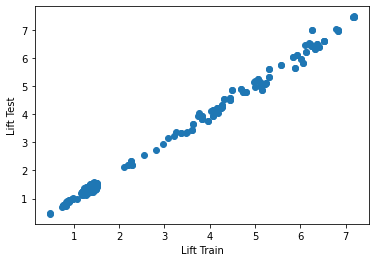

In [32]:
plt.scatter(
    evaluation.lift,
    evaluation.lift_test
)

plt.xlabel('Lift Train')
plt.ylabel('Lift Test')
plt.show()

In [33]:
(np.abs(evaluation.lift-evaluation.lift_test)/evaluation.lift).mean()

0.02835642641470029

In [34]:
rules_grocery_iter_2.sort_values(by='support', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
182,(oil),(cooking oil),0.465625,0.464234,0.297656,0.639262,1.377024,0.081497,1.485192
183,(cooking oil),(oil),0.464234,0.465625,0.297656,0.641177,1.377024,0.081497,1.489243
81,(oil),(cake),0.465625,0.361203,0.228047,0.489765,1.355927,0.059862,1.251966
82,(cake),(oil),0.361203,0.465625,0.228047,0.631354,1.355927,0.059862,1.449560
62,(cake),(cooking oil),0.361203,0.464234,0.227734,0.630488,1.358125,0.060051,1.449929
61,(cooking oil),(cake),0.464234,0.361203,0.227734,0.490559,1.358125,0.060051,1.253917
117,(oil),(candy bars),0.465625,0.299484,0.188797,0.405470,1.353893,0.049349,1.178268
118,(candy bars),(oil),0.299484,0.465625,0.188797,0.630406,1.353893,0.049349,1.445845
100,(candy bars),(cooking oil),0.299484,0.464234,0.187453,0.625920,1.348284,0.048422,1.432220
99,(cooking oil),(candy bars),0.464234,0.299484,0.187453,0.403790,1.348284,0.048422,1.174947


# No ECLAT yet or maybe not needed

## Association Rules by cluster

In [37]:
cluster_0 = num_cust_info[num_cust_info['cluster_kmeans'] == 0]

,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,...,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,longitude,age,female,total_lifetime_spend,number_dependents,dbscan_clustering,cluster_kmeans
customer_id,,,,,,,,,,,,,,,,,,,,,
2272,1,1,0,20,397.0,20.0,9.0,310.0,379.0,222.0,...,408.0,0.497251,2008,-9.127113,36,1,1753.0,2,3,0
8267,1,1,1,20,134.0,20.0,7.0,340.0,288.0,233.0,...,660.0,0.505459,2009,-9.120513,46,1,1502.0,2,3,0
27860,1,0,1,20,307.0,20.0,7.0,310.0,252.0,111.0,...,310.0,0.499070,2011,-9.145238,45,1,1403.0,1,3,0
20812,1,0,1,20,280.0,20.0,8.0,273.0,283.0,192.0,...,385.0,0.500067,2013,-9.132191,67,1,1464.0,1,3,0
12222,1,0,2,20,621.0,20.0,9.0,374.0,339.0,165.0,...,444.0,0.503549,2010,-9.184343,35,1,1857.0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17355,1,0,9,1,210.0,7.0,10.0,99.0,91.0,245.0,...,96.0,0.194987,2007,-9.139897,75,0,751.0,1,-1,0
29519,1,1,2,20,385.0,20.0,7.0,360.0,317.0,234.0,...,439.0,0.500286,2010,-9.173672,24,1,1599.0,2,3,0
27336,1,0,1,20,554.0,20.0,10.0,320.0,328.0,214.0,...,420.0,0.504164,2005,-9.129232,56,1,1834.0,1,3,0


In [50]:
basket_0 = basket.loc[cluster_0.index]
basket_0

,customer_id,invoice_id,list_of_goods
customer_id,,,
2272,5802,2295670,"['napkins', 'bacon', 'cooking oil', 'rice', 'c..."
8267,1231,2321779,"['cake', 'napkins', 'whole weat flour', 'cooki..."
27860,378,468390,"['white wine', 'cake', 'bacon', 'whole weat fl..."
20812,5580,3168866,"['tomatoes', 'chocolate bread', 'green beans',..."
12222,9716,1121439,"['cake', 'whole wheat rice', 'napkins', 'parme..."
...,...,...,...
17355,6086,11977731,"['whole weat flour', 'cider', 'yogurt cake', '..."
29519,8149,9116936,"['cake', 'fresh bread', 'bacon', 'cooking oil'..."
27336,8786,10132331,"['seabass', 'pet food', 'fresh bread', 'olive ..."


In [51]:
list_of_goods_0 = [ast.literal_eval(product) for product in basket_0["list_of_goods"].values]

In [52]:
# Separate train and test datasets
train_0 = list_of_goods_0[:int(len(list_of_goods_0)*0.8)]
test_0 = list_of_goods_0[int(len(list_of_goods_0)*0.8):]

In [55]:
te_0 = TransactionEncoder()
te_fit_0 = te_0.fit(train_0).transform(train_0)
transactions_items_0 = pd.DataFrame(te_fit_0, columns=te_0.columns_)

In [58]:
transactions_items_0.head()

,airpods,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,beats headphones,beer,...,vacuum cleaner,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [61]:
frequent_itemsets_grocery_0 = apriori(
    transactions_items_0, min_support=0.05, use_colnames=True
    )

In [62]:
frequent_itemsets_grocery_0.sort_values(by='support', ascending=False)

,support,itemsets
34,0.469151,(oil)
15,0.454633,(cooking oil)
7,0.358577,(cake)
98,0.296395,"(oil, cooking oil)"
8,0.295427,(candy bars)
...,...,...
147,0.050811,"(olive oil, cooking oil, oil)"
17,0.050327,(cotton buds)
124,0.050327,"(babies food, cooking oil, gums)"
23,0.050085,(green beans)


In [63]:
rules_grocery_0 = association_rules(frequent_itemsets_grocery_0, 
                                  metric="confidence", 
                                  min_threshold=0.2)

In [64]:
rules_grocery_0

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(asparagus),(carrots),0.142753,0.101379,0.055408,0.388136,3.828555,0.040935,1.468660
1,(carrots),(asparagus),0.101379,0.142753,0.055408,0.546539,3.828555,0.040935,1.890454
2,(asparagus),(tomatoes),0.142753,0.133801,0.077910,0.545763,4.078910,0.058809,1.906930
3,(tomatoes),(asparagus),0.133801,0.142753,0.077910,0.582278,4.078910,0.058809,2.052196
4,(babies food),(cake),0.238326,0.358577,0.116622,0.489340,1.364671,0.031164,1.256066
...,...,...,...,...,...,...,...,...,...
261,"(oil, muffins)","(cooking oil, cake)",0.141544,0.221873,0.051294,0.362393,1.633338,0.019890,1.220387
262,"(cooking oil, cake)","(oil, muffins)",0.221873,0.141544,0.051294,0.231189,1.633338,0.019890,1.116602
263,"(cooking oil, muffins)","(oil, cake)",0.138156,0.230825,0.051294,0.371278,1.608484,0.019405,1.223395
264,"(cake, muffins)","(oil, cooking oil)",0.107428,0.296395,0.051294,0.477477,1.610951,0.019453,1.346555


In [65]:
train_data_rules_0 = rules_grocery_0[['antecedents','consequents','lift']]

In [67]:
te_0 = TransactionEncoder()
te_fit_test_0 = te_0.fit(test_0).transform(test_0)
transactions_items_test_0 = pd.DataFrame(te_fit_test_0, columns=te.columns_)

frequent_itemsets_test_0 = apriori(
    transactions_items_test_0, min_support=0.02, use_colnames=True
    )

# We'll use a confidence level of 20%
rules_grocery_test_0 = association_rules(frequent_itemsets_test_0, 
                                  metric="confidence", 
                                  min_threshold=0.2)

In [68]:
test_data_rules_0 = rules_grocery_test_0[['antecedents','consequents','lift']]

In [71]:
evaluation_0 = train_data_rules_0.merge(
    test_data_rules_0,
    on=['antecedents','consequents']
)

In [72]:
plt.scatter(
    evaluation_0.lift,
    evaluation_0.lift_test
)

plt.xlabel('Lift Train')
plt.ylabel('Lift Test')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'lift'